In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
import datetime

## 1. Загрузка, фильтрация  и предобработка данных 
**1.1**
Загрузите данные за май 2016 года. Выведите первые несколько строк и разберитесь, какие характеристики поездок записываются в датасет. Выведите размер датасета

In [2]:
# для тех, кто загружает урезанный датасет
taxi=pd.read_csv("Taxi-may2016-small.csv")

In [3]:
# ваш код 
taxi.shape

(591843, 19)

In [4]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-05-07 11:02:42,2016-05-07 11:28:15,3,10.28,-73.986076,40.759579,1,N,-73.861961,40.768581,1,31.0,0.0,0.5,6.00,5.54,0.3,43.34
1,2,2016-05-18 18:12:05,2016-05-18 18:34:01,1,2.44,-73.981369,40.770149,1,N,-73.952690,40.780560,1,14.5,1.0,0.5,4.08,0.00,0.3,20.38
2,1,2016-05-17 11:32:11,2016-05-17 11:51:55,1,0.90,-73.990501,40.740799,1,N,-73.987007,40.747669,1,12.0,0.0,0.5,2.55,0.00,0.3,15.35
3,2,2016-05-02 09:53:26,2016-05-02 10:03:53,6,1.35,-73.989388,40.758049,1,N,-73.982132,40.776508,2,8.5,0.0,0.5,0.00,0.00,0.3,9.30
4,1,2016-05-15 09:19:11,2016-05-15 09:31:09,3,2.60,-73.999825,40.718182,1,Y,-73.992493,40.749336,2,11.5,0.0,0.5,0.00,0.00,0.3,12.30


In [5]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591843 entries, 0 to 591842
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               591843 non-null  int64  
 1   tpep_pickup_datetime   591843 non-null  object 
 2   tpep_dropoff_datetime  591843 non-null  object 
 3   passenger_count        591843 non-null  int64  
 4   trip_distance          591843 non-null  float64
 5   pickup_longitude       591843 non-null  float64
 6   pickup_latitude        591843 non-null  float64
 7   RatecodeID             591843 non-null  int64  
 8   store_and_fwd_flag     591843 non-null  object 
 9   dropoff_longitude      591843 non-null  float64
 10  dropoff_latitude       591843 non-null  float64
 11  payment_type           591843 non-null  int64  
 12  fare_amount            591843 non-null  float64
 13  extra                  591843 non-null  float64
 14  mta_tax                591843 non-nu

**1.2**
Проведите фильтрацию: удалите поездки с

- нулевой длительностью
- нулевым количеством пассажиров
- нулевым расстоянием поездки по счётчику
- координатами начала, не попадающими в прямоугольник Нью-Йорка

In [6]:
# Координаты прямоугольника Нью-Йорка
West=-74.25559
East=-73.70001
South=40.49612
North=40.91553

In [7]:
taxi = taxi.drop(taxi[(taxi.tpep_pickup_datetime == taxi.tpep_dropoff_datetime)|
                     (taxi.passenger_count == 0)|
                     (taxi.trip_distance == 0)|
                     (taxi.pickup_longitude > East)|
                     (taxi.pickup_longitude < West)|
                     (taxi.pickup_latitude > North)|
                     (taxi.pickup_latitude < South)].index)

In [8]:
(West-East)/50

-0.01111159999999984

**1.2** Отбросьте минуты и секунды во времени начала поездки.

Вариант как можно это сделать: 
- преобразовать строковые данные из `tpep_pickup_datetime` в формат datetime (`pandas.to_datetime()`)
- округлить до часов с помощью функции `datetime.floor()`

In [9]:
taxi.tpep_pickup_datetime = pd.to_datetime(taxi.tpep_pickup_datetime).apply(lambda x: x.round('H'))
taxi.tpep_dropoff_datetime = pd.to_datetime(taxi.tpep_dropoff_datetime).apply(lambda x: x.round('H'))

In [10]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-05-07 11:00:00,2016-05-07 11:00:00,3,10.28,-73.986076,40.759579,1,N,-73.861961,40.768581,1,31.0,0.0,0.5,6.00,5.54,0.3,43.34
1,2,2016-05-18 18:00:00,2016-05-18 19:00:00,1,2.44,-73.981369,40.770149,1,N,-73.952690,40.780560,1,14.5,1.0,0.5,4.08,0.00,0.3,20.38
2,1,2016-05-17 12:00:00,2016-05-17 12:00:00,1,0.90,-73.990501,40.740799,1,N,-73.987007,40.747669,1,12.0,0.0,0.5,2.55,0.00,0.3,15.35
3,2,2016-05-02 10:00:00,2016-05-02 10:00:00,6,1.35,-73.989388,40.758049,1,N,-73.982132,40.776508,2,8.5,0.0,0.5,0.00,0.00,0.3,9.30
4,1,2016-05-15 09:00:00,2016-05-15 10:00:00,3,2.60,-73.999825,40.718182,1,Y,-73.992493,40.749336,2,11.5,0.0,0.5,0.00,0.00,0.3,12.30


**1.3.**  
- разбейте этот прямоугольник Нью-Йорка на 2500 одинаковых прямоугольных областей — по 50 интервалов вдоль каждой оси. 

Разбивать надо также, как в файле `regions.csv`, поэтому для начала 
- откройте его, выведите несколько первых строк датасета и поймите принцип, по которому проводится разбиение


In [11]:
# ваш код
reg=pd.read_csv('regions.csv', sep=';')
reg.tail(70)

,region,west,east,south,north
2430,2431,-73.722233,-73.711122,40.747766,40.756154
2431,2432,-73.722233,-73.711122,40.756154,40.764542
2432,2433,-73.722233,-73.711122,40.764542,40.772931
2433,2434,-73.722233,-73.711122,40.772931,40.781319
2434,2435,-73.722233,-73.711122,40.781319,40.789707
...,...,...,...,...,...
2495,2496,-73.711122,-73.700010,40.873589,40.881977
2496,2497,-73.711122,-73.700010,40.881977,40.890365
2497,2498,-73.711122,-73.700010,40.890365,40.898754
2498,2499,-73.711122,-73.700010,40.898754,40.907142


In [12]:
grid = pd.DataFrame(columns=['Region','West','East','South','North'])
grid['Region'] = [i+1 for i in range(2500)]

In [13]:
grid

,Region,West,East,South,North
0,1,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2495,2496,NaN,NaN,NaN,NaN
2496,2497,NaN,NaN,NaN,NaN
2497,2498,NaN,NaN,NaN,NaN
2498,2499,NaN,NaN,NaN,NaN


In [14]:
def separate(num = 50, North=North, South=South, West=West, East=East, grid=grid):
    grid_df = grid.copy()
    long_sep = abs(North-South)/num
    lat_sep = abs(West-East)/num
    for i in range(num):
        for j in range(num):
            grid_df.loc[j+i*50, ['West','East','South','North']] = [West+lat_sep*i, West+lat_sep*(i+1), South+long_sep*j, South+long_sep*(j+1)]
    return grid_df
        

In [15]:
grid = separate(grid=grid)

In [16]:
grid.isna().sum()

Region    0
West      0
East      0
South     0
North     0
dtype: int64

In [17]:
grid.tail(70)

,Region,West,East,South,North
2430,2431,-73.722233,-73.711122,40.747766,40.756154
2431,2432,-73.722233,-73.711122,40.756154,40.764542
2432,2433,-73.722233,-73.711122,40.764542,40.772931
2433,2434,-73.722233,-73.711122,40.772931,40.781319
2434,2435,-73.722233,-73.711122,40.781319,40.789707
...,...,...,...,...,...
2495,2496,-73.711122,-73.70001,40.873589,40.881977
2496,2497,-73.711122,-73.70001,40.881977,40.890365
2497,2498,-73.711122,-73.70001,40.890365,40.898754
2498,2499,-73.711122,-73.70001,40.898754,40.907142


**1.4.**
Всем поездкам из датасета  присвойте соответсвующий номера региона

Вариант того, как это можно сделать: создать функцию 

`set_reg(dataset, number_of_ceils=50, W=West, E=East, S=South, N=North)`

и применить ее к вашему датасету с поездками за май.

Также можно создать функцию для определения региона для единичного объекта по его координатам (потом пригодится для нахождения региона Empire State Building)

In [43]:
#ваш код
def set_reg(dataset, number_of_ceils=50, W=West, E=East, S=South, N=North):
    step_long = (E-W)/number_of_ceils
    step_lat = (N-S)/number_of_ceils
    long = np.floor((dataset['pickup_longitude']-W)/step_long)
    lat = np.floor((dataset['pickup_latitude']-S)/step_lat)
    dataset['region'] = long*number_of_ceils + lat + 1
    return dataset

def single_region(vec, number_of_ceils=50, W=West, E=East, S=South, N=North):
    step_long = (E-W)/number_of_ceils
    step_lat = (N-S)/number_of_ceils
    long = np.floor((vec[0]-W)/step_long)
    lat = np.floor((vec[1]-S)/step_lat)
    region = long*number_of_ceils + lat + 1
    return region

#векторная функция для определения региона для единичного объекта по его координатам
def find_reg_with_coords(long,lat,n_segments=50):
    longs=np.linspace(West, East, n_segments, endpoint=False)
    lats=np.linspace(South, North, n_segments, endpoint=False)
    inds_long=np.searchsorted(longs,long)
    inds_lat=np.searchsorted(lats,lat)
    #print(inds_long)
    return (inds_long-1)*n_segments+inds_lat

In [19]:
taxi = set_reg(dataset=taxi)

In [24]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region
0,2,2016-05-07 11:00:00,2016-05-07 11:00:00,3,10.28,-73.986076,40.759579,1,N,-73.861961,40.768581,1,31.0,0.0,0.5,6.00,5.54,0.3,43.34,1232.0
1,2,2016-05-18 18:00:00,2016-05-18 19:00:00,1,2.44,-73.981369,40.770149,1,N,-73.952690,40.780560,1,14.5,1.0,0.5,4.08,0.00,0.3,20.38,1233.0
2,1,2016-05-17 12:00:00,2016-05-17 12:00:00,1,0.90,-73.990501,40.740799,1,N,-73.987007,40.747669,1,12.0,0.0,0.5,2.55,0.00,0.3,15.35,1180.0
3,2,2016-05-02 10:00:00,2016-05-02 10:00:00,6,1.35,-73.989388,40.758049,1,N,-73.982132,40.776508,2,8.5,0.0,0.5,0.00,0.00,0.3,9.30,1182.0
4,1,2016-05-15 09:00:00,2016-05-15 10:00:00,3,2.60,-73.999825,40.718182,1,Y,-73.992493,40.749336,2,11.5,0.0,0.5,0.00,0.00,0.3,12.30,1177.0


## 2. Создание датасета с данными, агрегированными по времени и региону

**2.1.** Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу

**Советы:**
- Для агрегации данных по часам вам нужно найти число часов в мае 2016.
Можно воспользоваться методом `pandas.Period('name_of_period').days_in_month`
- Функция `stats.binned_statistic_2d` - это по сути двухмерная гистограмма. Вам нужно разбить данные на двухмерные ячейки. Одно измерение - это часы, второе - регионы. Чтобы в одну ячейку попадал ровно 1 час и 1 регион, пропишите `bins=[binx,biny]`. А списки `binx` и `biny` можно задать с помощью `np.linspace()`
- Для нахождения периода, прошедшего с 1 мая до поездки можете использовать такой код:
`delta=taxi1['hours']=(taxi1['tpep_pickup_datetime']-pd.to_datetime("2016-05-01 00:00:00", format='%Y-%m-%d %H:%M:%S'))`
- Вычислить число дней в периоде `delta`  можно с помощью `delta.days`, а секунд - `delta.seconds`


In [20]:
#check number of hours
num_of_hours = pd.Period('May').days_in_month*24
print(f"Количество часов в мае: {num_of_hours}")

Количество часов в мае: 744


In [25]:
taxi['hours']=list(map(lambda x: int(x.seconds/3600+x.days*24),(taxi['tpep_pickup_datetime']-
                                                 pd.to_datetime("2016-05-01 00:00:00", format='%Y-%m-%d %H:%M:%S'))))

In [21]:
binx, biny = np.linspace(1, num_of_hours, num_of_hours+1), np.linspace(1, 2501, 2501)

In [22]:
binx

array([  1.        ,   1.99865591,   2.99731183,   3.99596774,
         4.99462366,   5.99327957,   6.99193548,   7.9905914 ,
         8.98924731,   9.98790323,  10.98655914,  11.98521505,
        12.98387097,  13.98252688,  14.9811828 ,  15.97983871,
        16.97849462,  17.97715054,  18.97580645,  19.97446237,
        20.97311828,  21.97177419,  22.97043011,  23.96908602,
        24.96774194,  25.96639785,  26.96505376,  27.96370968,
        28.96236559,  29.96102151,  30.95967742,  31.95833333,
        32.95698925,  33.95564516,  34.95430108,  35.95295699,
        36.9516129 ,  37.95026882,  38.94892473,  39.94758065,
        40.94623656,  41.94489247,  42.94354839,  43.9422043 ,
        44.94086022,  45.93951613,  46.93817204,  47.93682796,
        48.93548387,  49.93413978,  50.9327957 ,  51.93145161,
        52.93010753,  53.92876344,  54.92741935,  55.92607527,
        56.92473118,  57.9233871 ,  58.92204301,  59.92069892,
        60.91935484,  61.91801075,  62.91666667,  63.91

In [26]:
ret = stats.binned_statistic_2d(taxi.hours,taxi.region, None, 'count', bins=[binx, biny])

In [28]:
ret.statistic.shape

(744, 2500)

In [32]:
from datetime import datetime as dt
from datetime import timedelta, date
t = np.arange(dt(2016,5,1,0), dt(2016,6,1,0), timedelta(hours=1)).astype(dt)

In [36]:
time_region_agreg=pd.DataFrame(data=ret.statistic,columns=np.linspace(1,2500,2500),index=t)
time_region_agreg

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,2491.0,2492.0,2493.0,2494.0,2495.0,2496.0,2497.0,2498.0,2499.0,2500.0
2016-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 ## 3. Анализ агрегированных данных

**3.1** Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building 

In [39]:
#Longitude of Empire State Building -73.985664
#Latitude of Empire State Building: 40.748441
ESB_long = -73.985664
ESB_lat  =  40.748441
vec=[ESB_long,ESB_lat]

Определите регион, содержащий Empire State Building

In [44]:
# Ваш код
ESB_reg=single_region(vec=vec)
print(ESB_reg)

1231.0


In [45]:
ESB_reg=find_reg_with_coords(ESB_long,ESB_lat,n_segments=50)
print(ESB_reg)

1231


Измените код из ячейки под свои названия датасетов и выведите график изменения числа поездок. **Не запускайте ячейку снизу - это образец!**

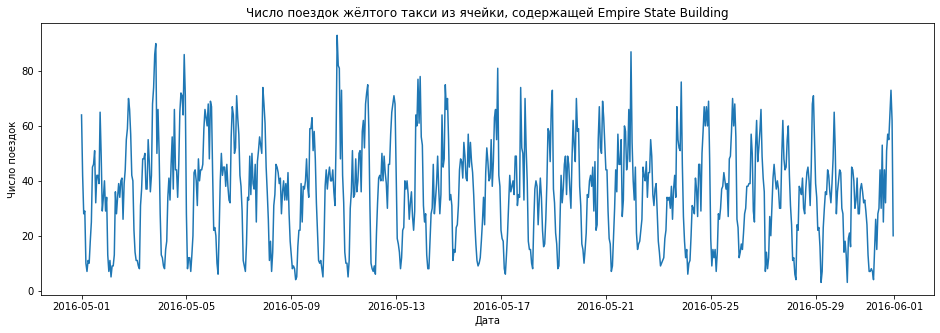

In [47]:
plt.figure(figsize=(16,5))
plt.plot(time_region_agreg.index, time_region_agreg.iloc[:,int(ESB_reg)], color='tab:blue')
plt.gca().set(title="Число поездок жёлтого такси из ячейки, содержащей Empire State Building", xlabel="Дата", ylabel="Число поездок")
plt.show()

**3.2** Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.

In [48]:
# Ваш код1718238
time_region_agreg.eq(0).sum().sum()

1801965

**3.3.** Сохраните датасет с агрегированными данными в файл

In [ ]:
df.to_csv("Taxi-may2016-agregated.csv",index=False)